# Assignment 1: Machine Learning & Comprehensive EDA

**Name:** Monesh M
**Register Number:** 3122235001084

## Aim
To implement Machine Learning tasks on various datasets (Loan, Diabetes, English-to-Tamil, Spam, Iris) and perform comprehensive Exploratory Data Analysis (EDA) including:
1. Histogram Distribution
2. Box Plot (Outlier Detection)
3. Correlation Heatmap
4. Pair Plot (with class separation)

## Datasets
- loan_data.csv
- DiabetesPredictionDataset.csv
- email.csv (Spam Detection)
- iris.csv


In [9]:
# ============================
# 1. IMPORTS & SETUP
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

# Set Global Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [10]:
# ============================
# 2. HELPER FUNCTION: EDA
# ============================

def perform_eda(df, dataset_name, target_col=None):
    print(f"\n{'='*40}\nEDA for {dataset_name}\n{'='*40}")
    
    # 1. Info
    print("--- Data Info ---")
    print(df.info())
    print("\n--- First 5 Rows ---")
    display(df.head())
    
    # Select Numeric Columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    if len(numeric_cols) == 0:
        print("No numeric columns found for plotting.")
        return
    
    # 2. Histograms
    print(f"\n1. Histogram Distribution ({dataset_name})")
    df[numeric_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
    plt.suptitle(f'Histograms - {dataset_name}', fontsize=16)
    plt.show()
    
    # 3. Box Plots
    print(f"\n2. Box Plots for Outlier Detection ({dataset_name})")
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df[numeric_cols], orient='h')
    plt.title(f'Box Plots - {dataset_name}', fontsize=16)
    plt.show()
    
    # 4. Correlation Heatmap
    print(f"\n3. Correlation Heatmap ({dataset_name})")
    plt.figure(figsize=(12, 10))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Matrix - {dataset_name}', fontsize=16)
    plt.show()
    
    # 5. Pair Plot
    print(f"\n4. Pair Plot ({dataset_name})")
    if target_col and target_col in df.columns:
        # Use a copy to avoid messing up original df if we need to encode for plot only
        plot_df = df.copy()
        # Limit numeric cols if there are too many to prevent slow plotting
        cols_to_plot = list(numeric_cols[:10]) # First 10 numeric
        if target_col not in cols_to_plot:
            cols_to_plot.append(target_col)
            
        sns.pairplot(plot_df[cols_to_plot], hue=target_col, palette='viridis')
        plt.suptitle(f'Pair Plot - {dataset_name} (Hue: {target_col})', y=1.02, fontsize=16)
        plt.show()
    else:
        print("Target column not numeric or not found, skipping hue in pairplot.")
        sns.pairplot(df[numeric_cols])
        plt.show()


## Task 1: Loan Dataset (Regression/Classification)

Loan Dataset Loaded

EDA for Loan Dataset
--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    int32  
 1   Gender             381 non-null    int32  
 2   Married            381 non-null    int32  
 3   Dependents         381 non-null    int32  
 4   Education          381 non-null    int32  
 5   Self_Employed      381 non-null    int32  
 6   ApplicantIncome    381 non-null    float64
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    float64
 10  Credit_History     381 non-null    float64
 11  Property_Area      381 non-null    int32  
 12  Loan_Status        381 non-null    int32  
dtypes: float64(5), int32(8)
memory usage: 26.9 KB
None

--- First 5 Rows ---


Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        1           1          0              0   
1        1       1        1           0          0              1   
2        2       1        1           0          1              0   
3        3       1        0           0          0              0   
4        4       1        1           0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           4583.0             1508.0       128.0             360.0   
1           3000.0                0.0        66.0             360.0   
2           2583.0             2358.0       120.0             360.0   
3           6000.0                0.0       141.0             360.0   
4           2333.0             1516.0        95.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              0            0  
1             1.0              2            1  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1


1. Histogram Distribution (Loan Dataset)


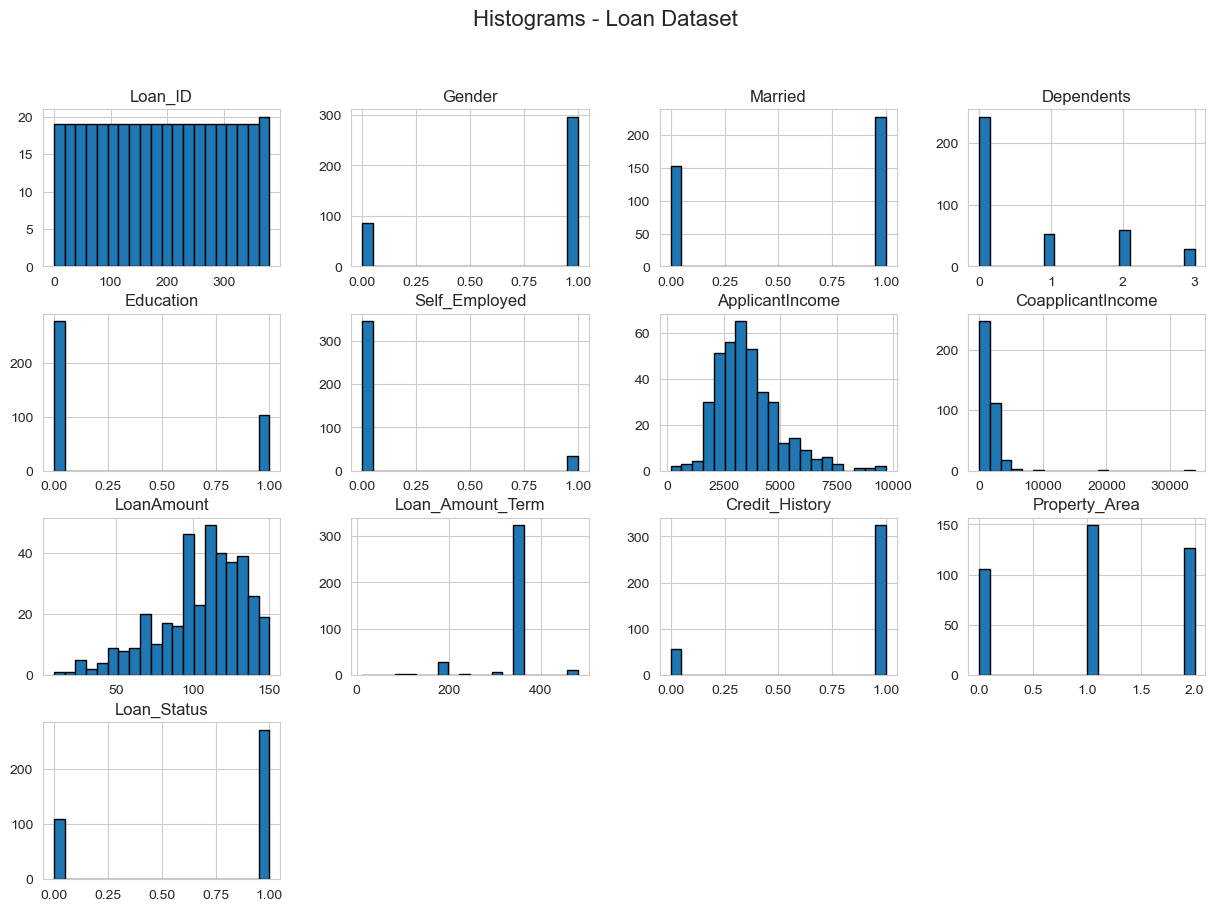


2. Box Plots for Outlier Detection (Loan Dataset)


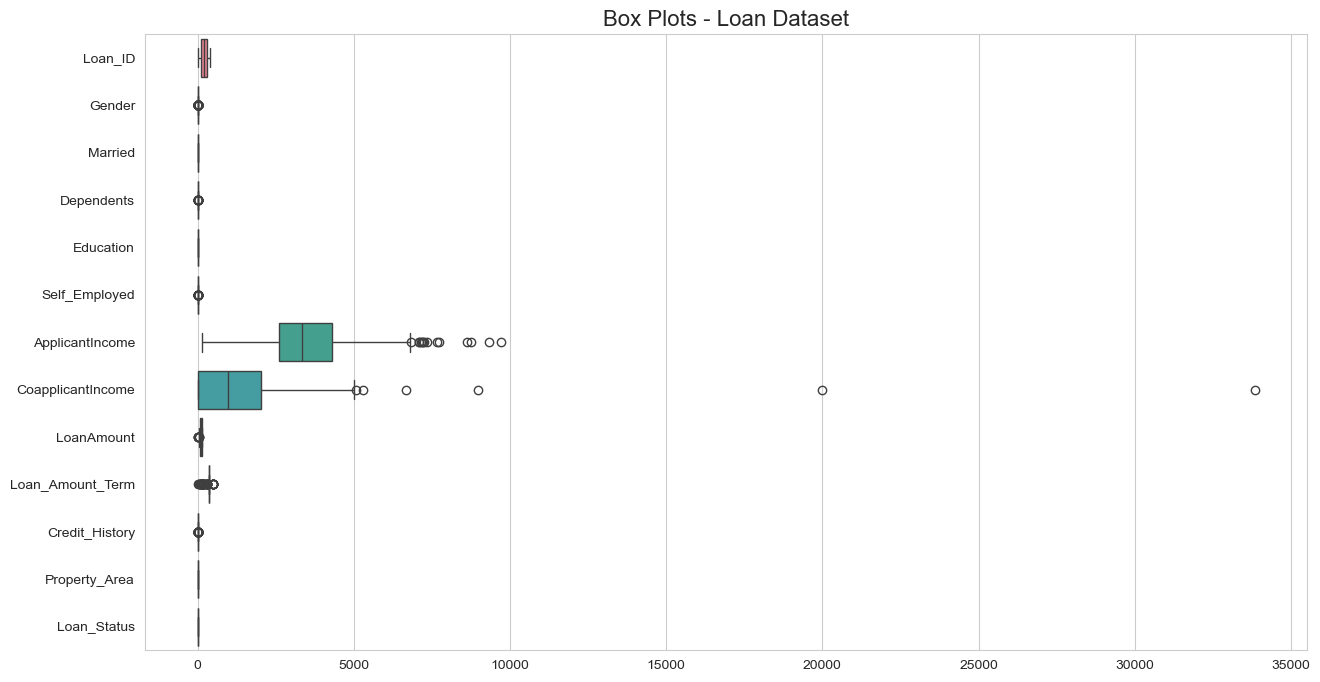


3. Correlation Heatmap (Loan Dataset)


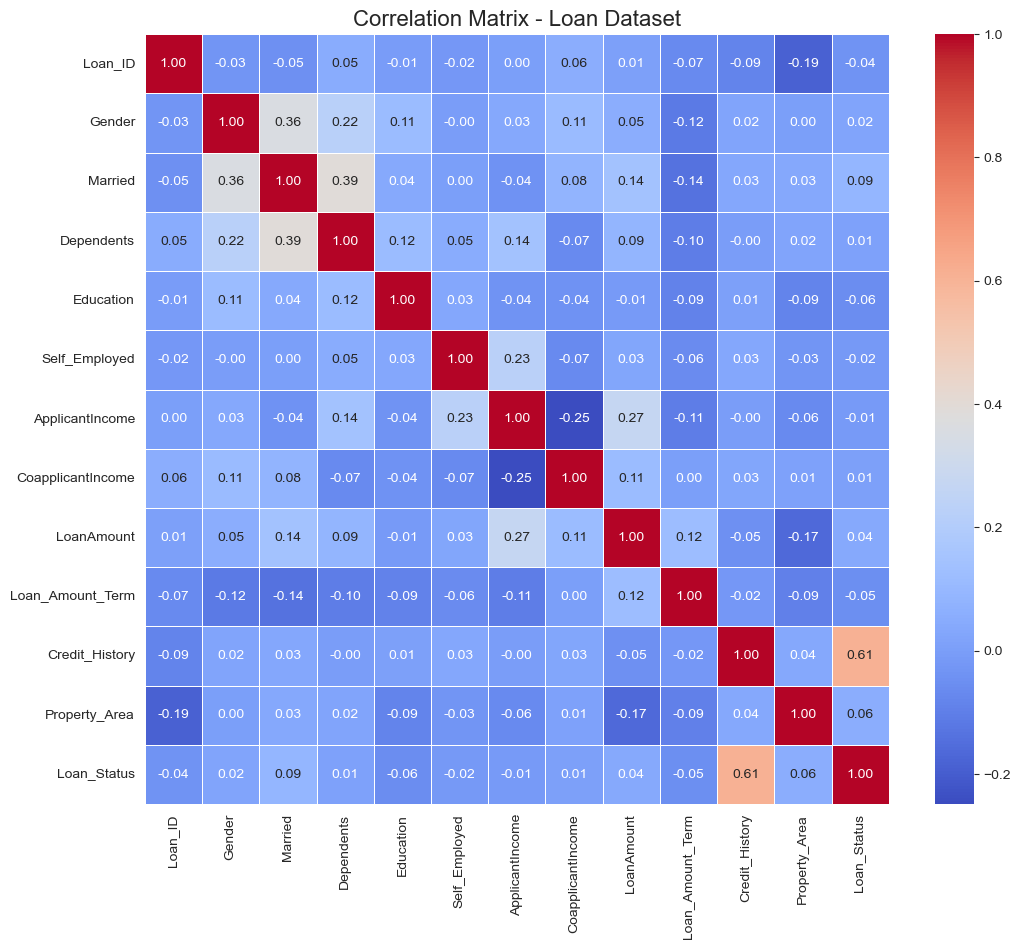


4. Pair Plot (Loan Dataset)


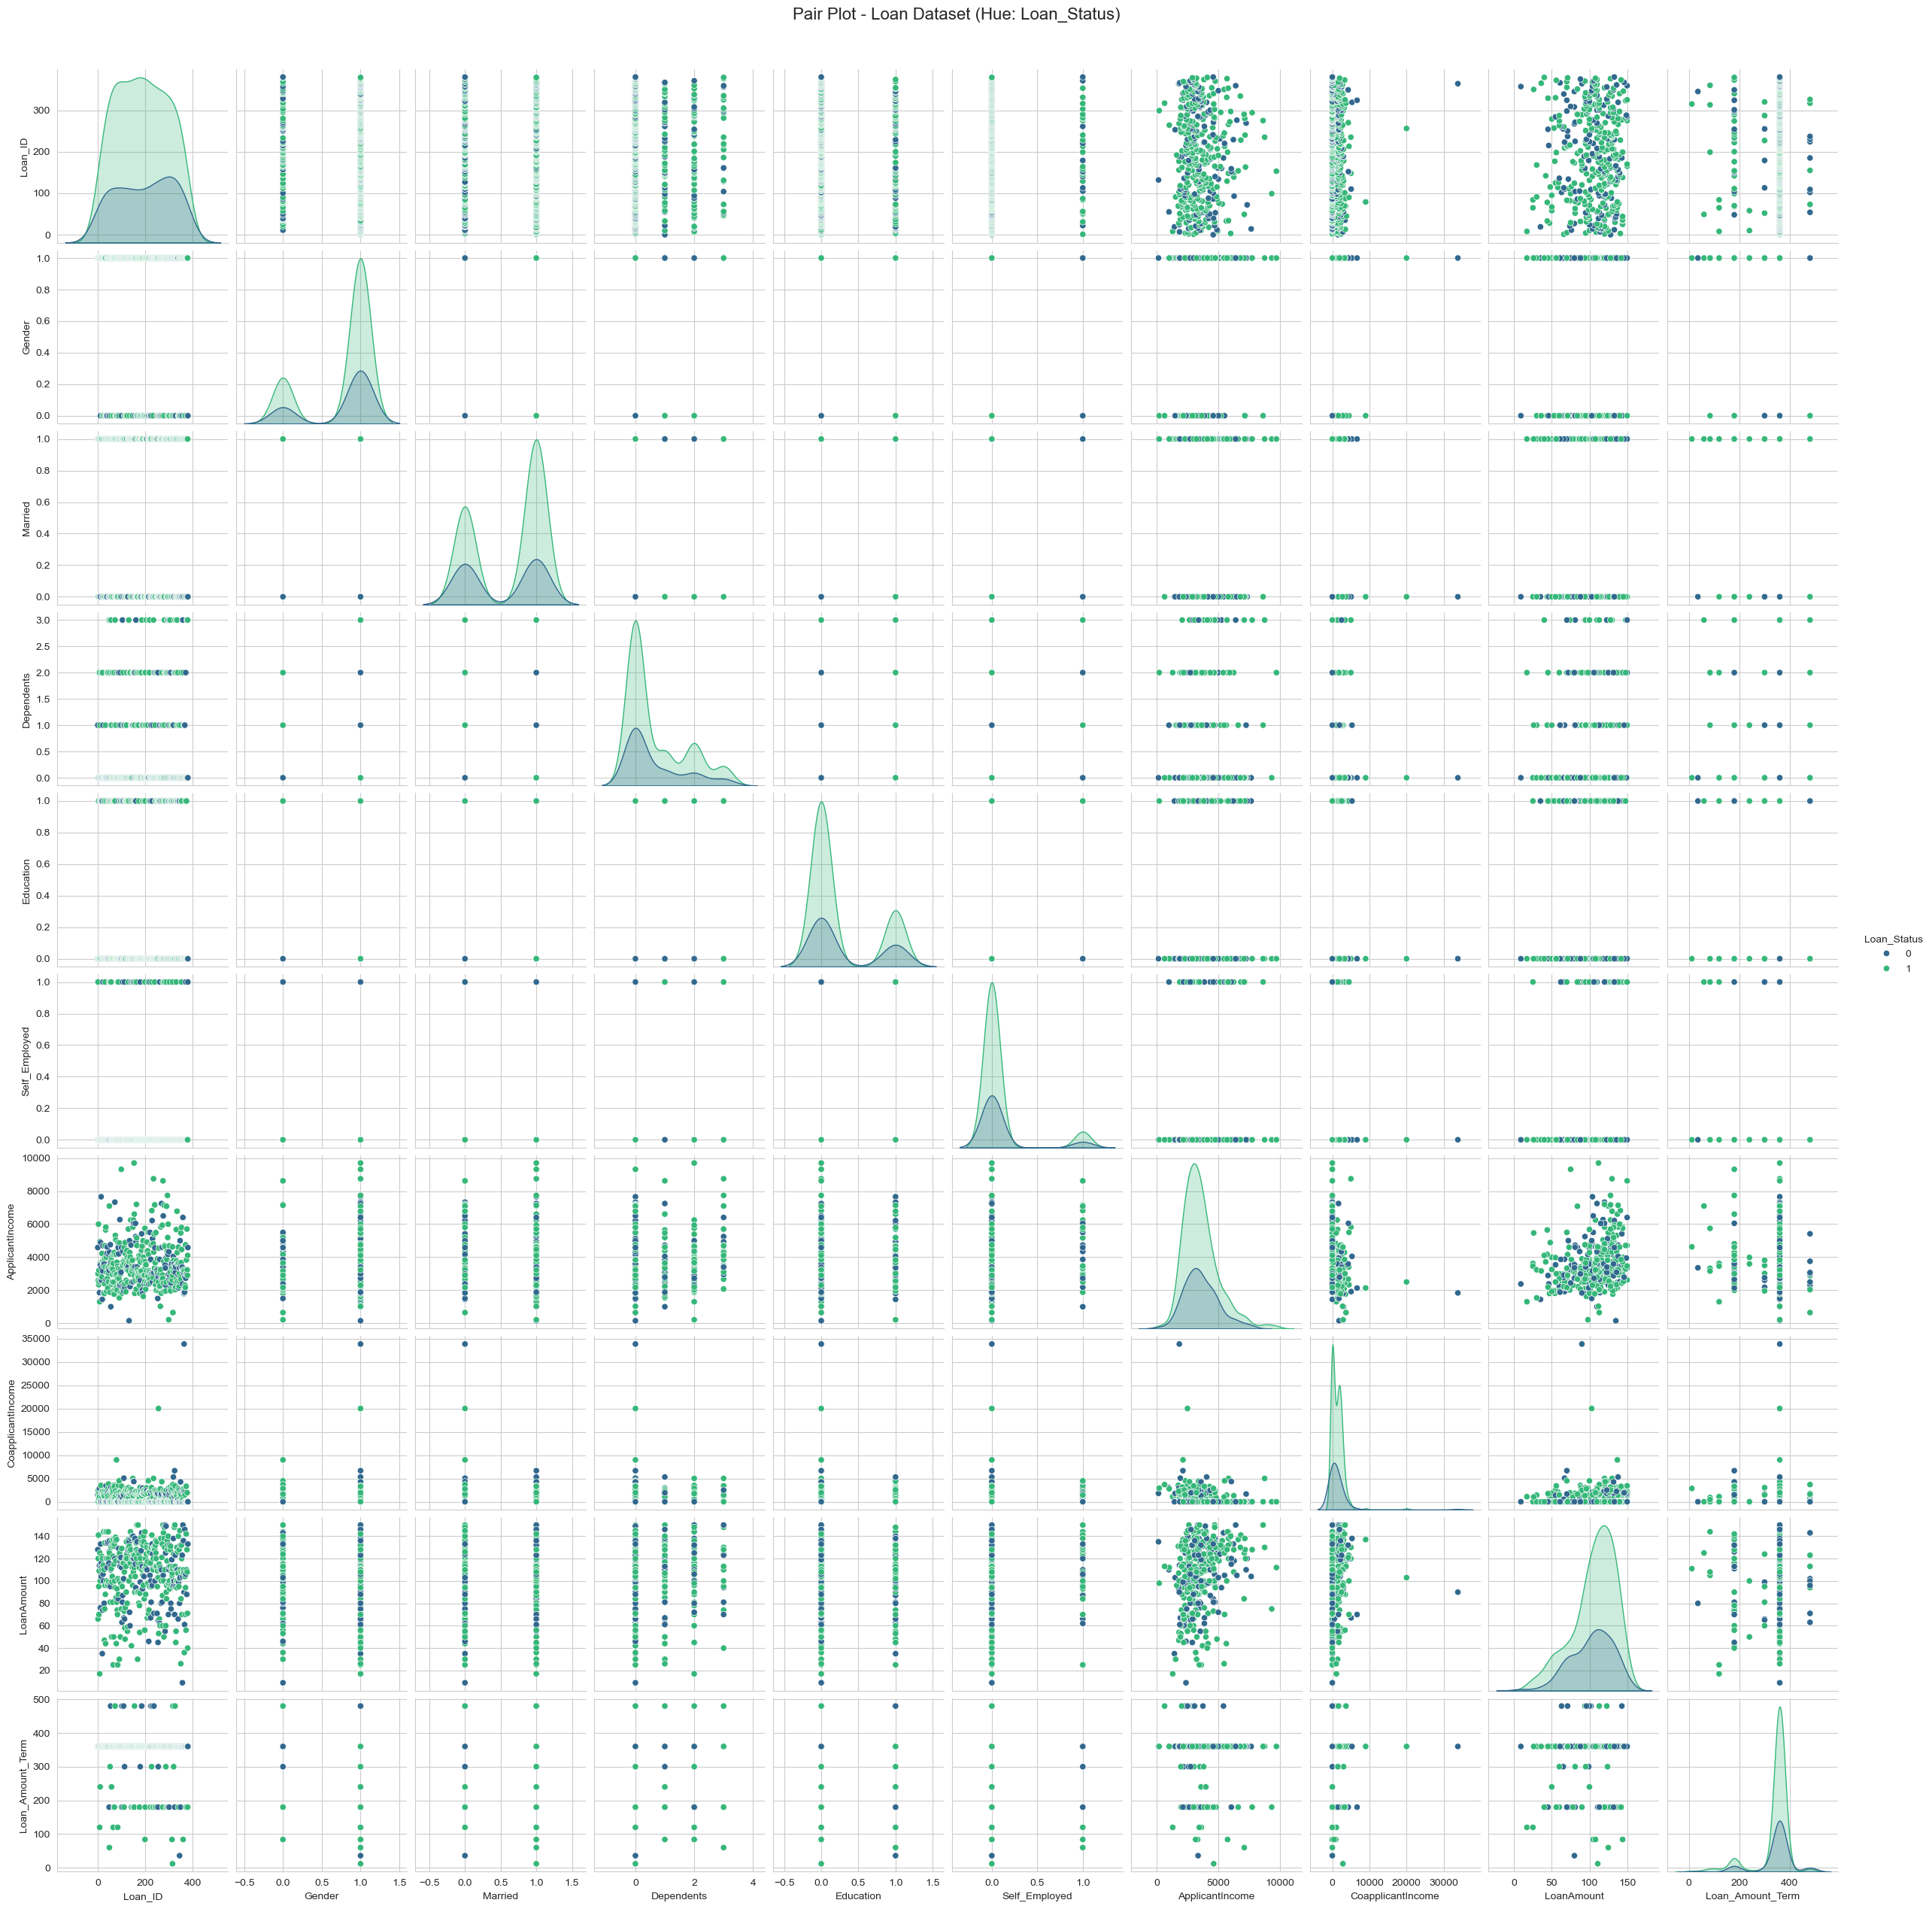

Loan Amount Prediction R2 Score: -0.00


In [11]:
# Load Data
try:
    df_loan = pd.read_csv('loan_data.csv')
    print("Loan Dataset Loaded")
    
    # Preprocessing
    # Handle missing values
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    
    num_cols = df_loan.select_dtypes(include=['number']).columns
    cat_cols = df_loan.select_dtypes(include=['object']).columns
    
    df_loan[num_cols] = num_imputer.fit_transform(df_loan[num_cols])
    df_loan[cat_cols] = cat_imputer.fit_transform(df_loan[cat_cols])
    
    # Encode Categorical
    le = LabelEncoder()
    for col in cat_cols:
        df_loan[col] = le.fit_transform(df_loan[col])
        
    # EDA
    perform_eda(df_loan, "Loan Dataset", target_col='Loan_Status')
    
    # Modeling (Prediction of LoanAmount)
    X = df_loan.drop(['LoanAmount', 'Loan_ID'], axis=1, errors='ignore')
    y = df_loan['LoanAmount']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestRegressor(n_estimators=50)
    rf.fit(X_train, y_train)
    print(f"Loan Amount Prediction R2 Score: {rf.score(X_test, y_test):.2f}")

except FileNotFoundError:
    print("loan_data.csv not found.")


## Task 2: Diabetes Dataset

Diabetes Dataset Loaded

EDA for Diabetes Dataset
--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int32  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int32  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.1 MB
None

--- First 5 Rows ---


gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0


1. Histogram Distribution (Diabetes Dataset)


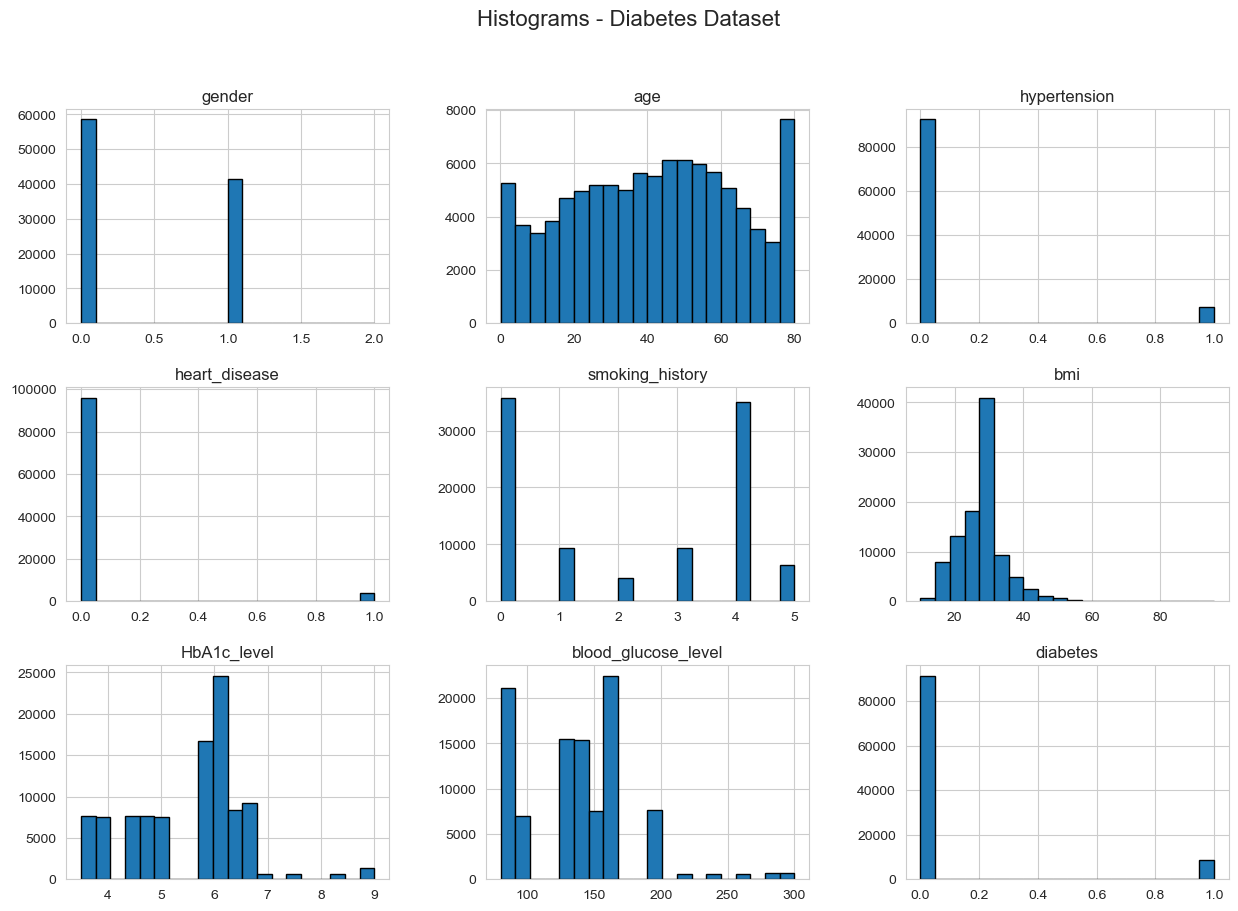


2. Box Plots for Outlier Detection (Diabetes Dataset)


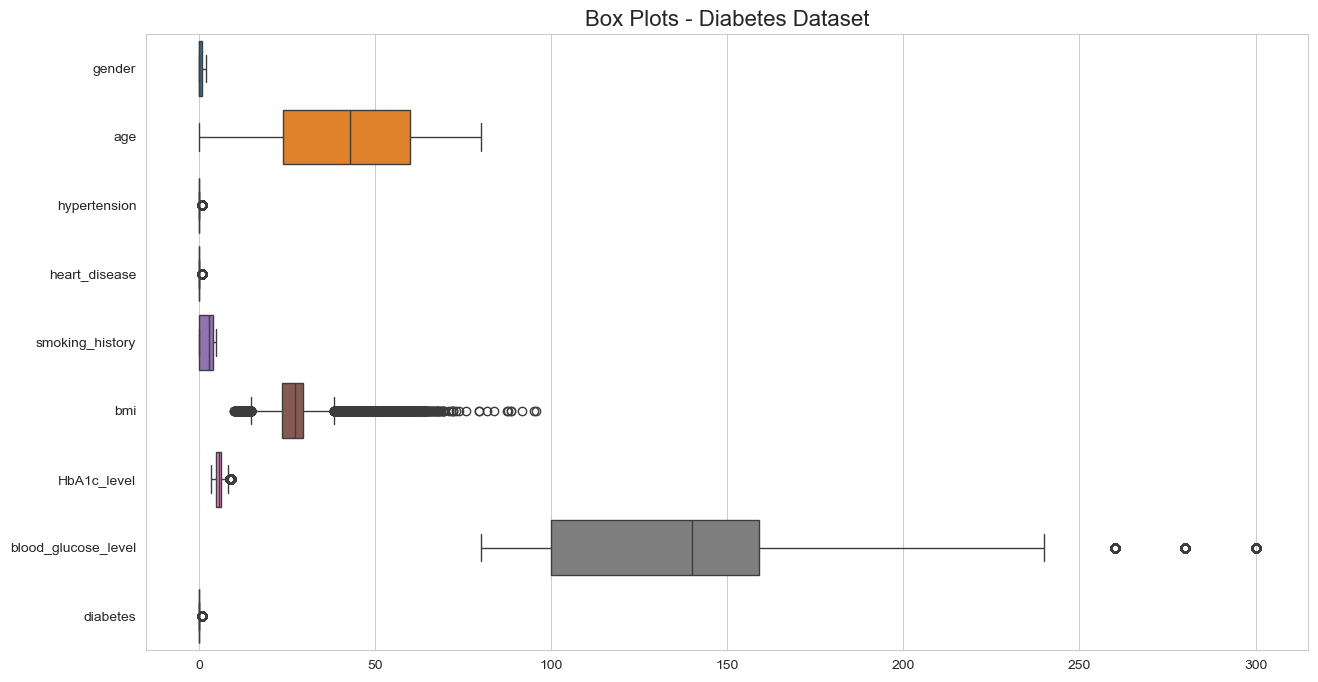


3. Correlation Heatmap (Diabetes Dataset)


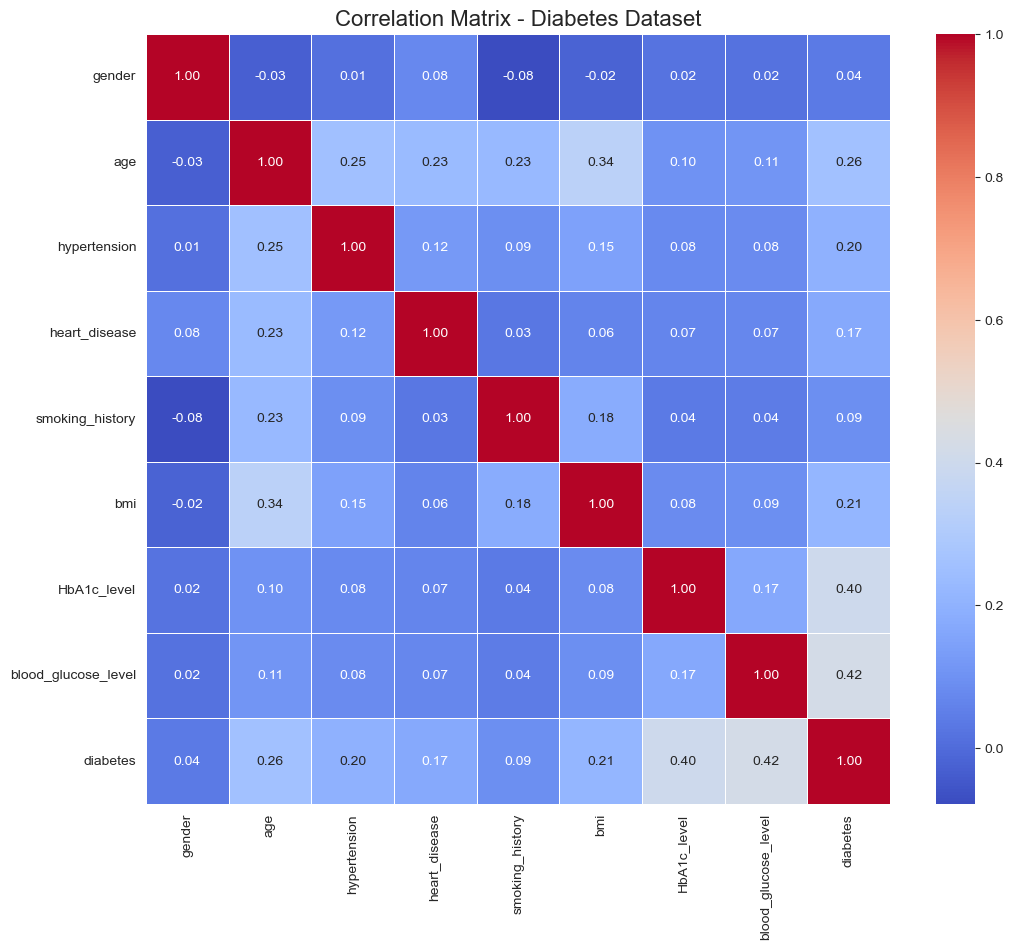


4. Pair Plot (Diabetes Dataset)


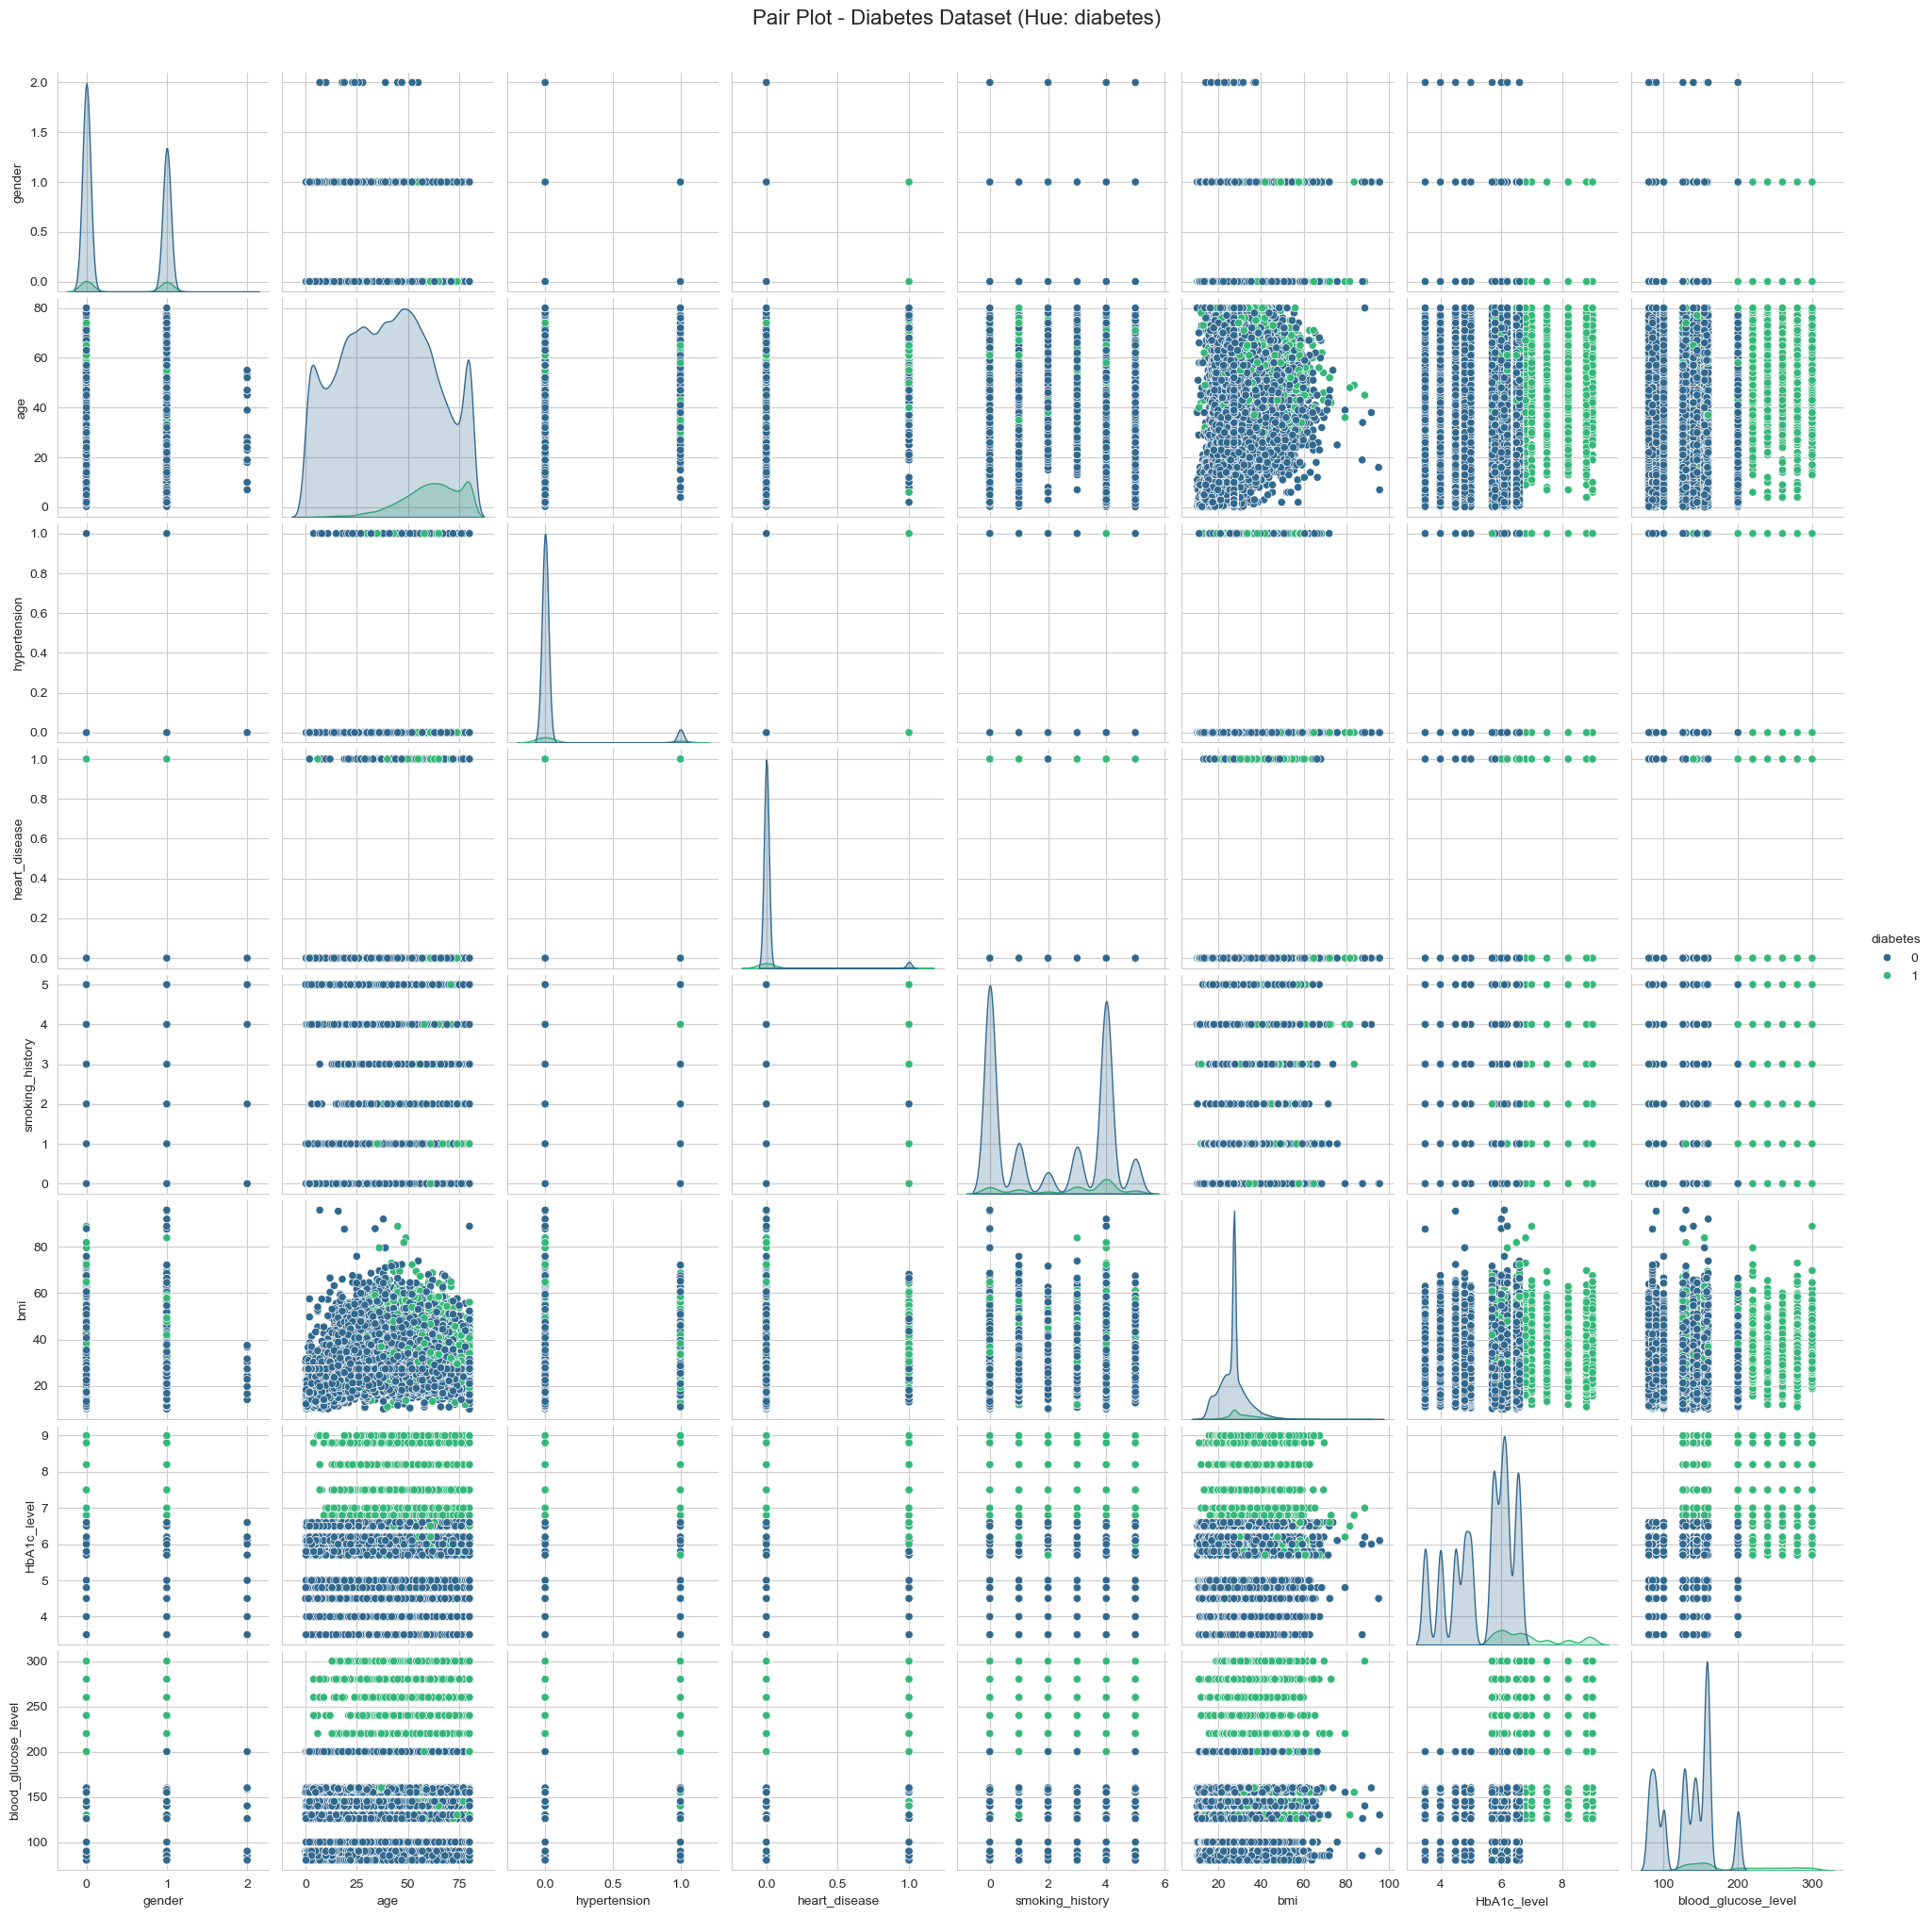

Diabetes Prediction Accuracy: 0.96975


In [12]:
try:
    df_diabetes = pd.read_csv('DiabetesPredictionDataset.csv')
    print("Diabetes Dataset Loaded")
    
    # Encoding
    if 'gender' in df_diabetes.columns:
        df_diabetes['gender'] = LabelEncoder().fit_transform(df_diabetes['gender'])
    if 'smoking_history' in df_diabetes.columns:
        df_diabetes['smoking_history'] = LabelEncoder().fit_transform(df_diabetes['smoking_history'])
        
    # EDA
    perform_eda(df_diabetes, "Diabetes Dataset", target_col='diabetes')
    
    # Model
    X = df_diabetes.drop('diabetes', axis=1)
    y = df_diabetes['diabetes']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    print("Diabetes Prediction Accuracy:", clf.score(X_test, y_test))

except FileNotFoundError:
    print("DiabetesPredictionDataset.csv not found.")


## Task 3: Spam Email Classification (Text + EDA)
**Note:** To perform EDA (Box Plots, Histograms) on text data, we derive features like `Message Length` and `Word Count`.

Email Dataset Loaded

EDA for Spam Email Dataset
--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      5573 non-null   object
 1   Message       5573 non-null   object
 2   message_len   5573 non-null   int64 
 3   word_count    5573 non-null   int64 
 4   Category_Enc  5573 non-null   int32 
dtypes: int32(1), int64(2), object(2)
memory usage: 196.1+ KB
None

--- First 5 Rows ---


Category                                            Message  message_len  \
0      ham  Go until jurong point, crazy.. Available only ...          111   
1      ham                      Ok lar... Joking wif u oni...           29   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...          155   
3      ham  U dun say so early hor... U c already then say...           49   
4      ham  Nah I don't think he goes to usf, he lives aro...           61   

   word_count  Category_Enc  
0          20             0  
1           6             0  
2          28             1  
3          11             0  
4          13             0


1. Histogram Distribution (Spam Email Dataset)


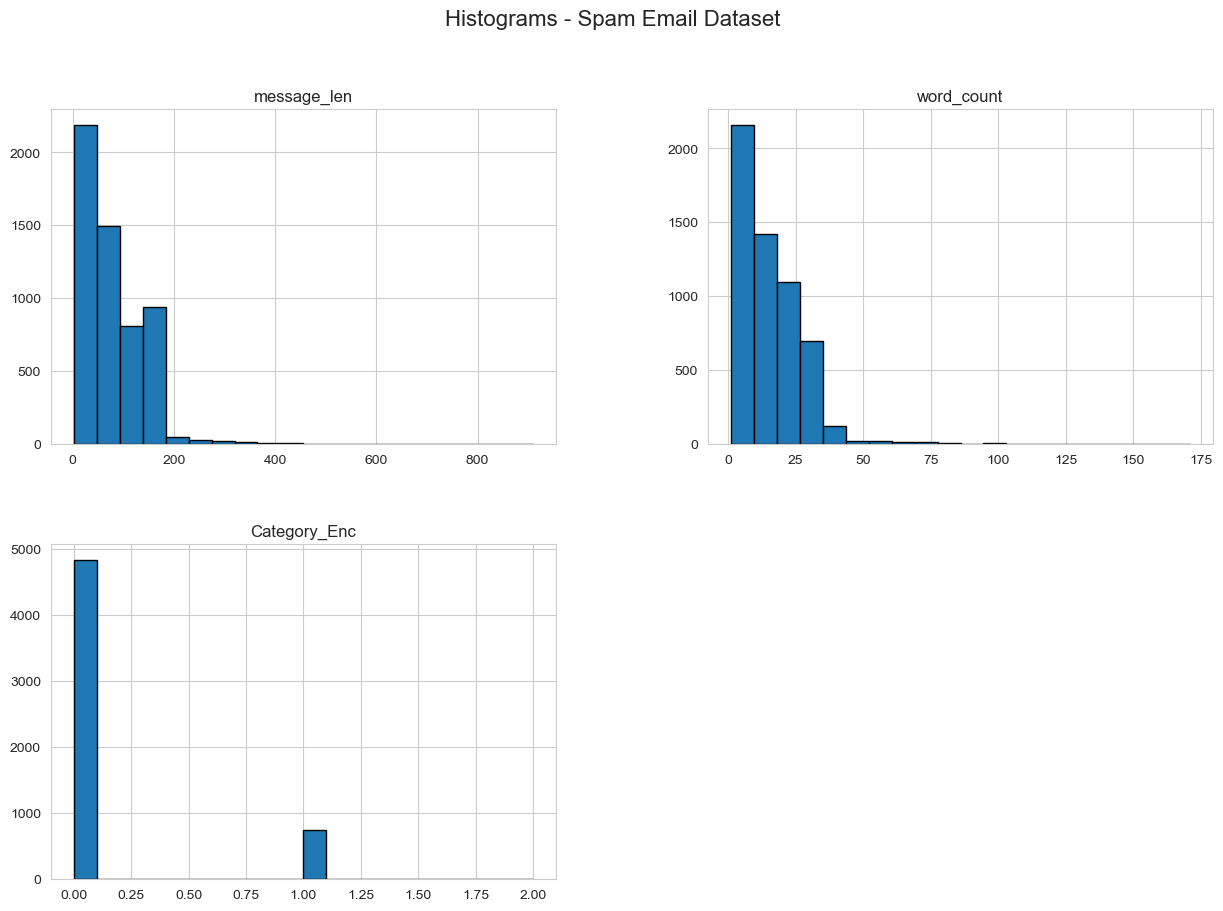


2. Box Plots for Outlier Detection (Spam Email Dataset)


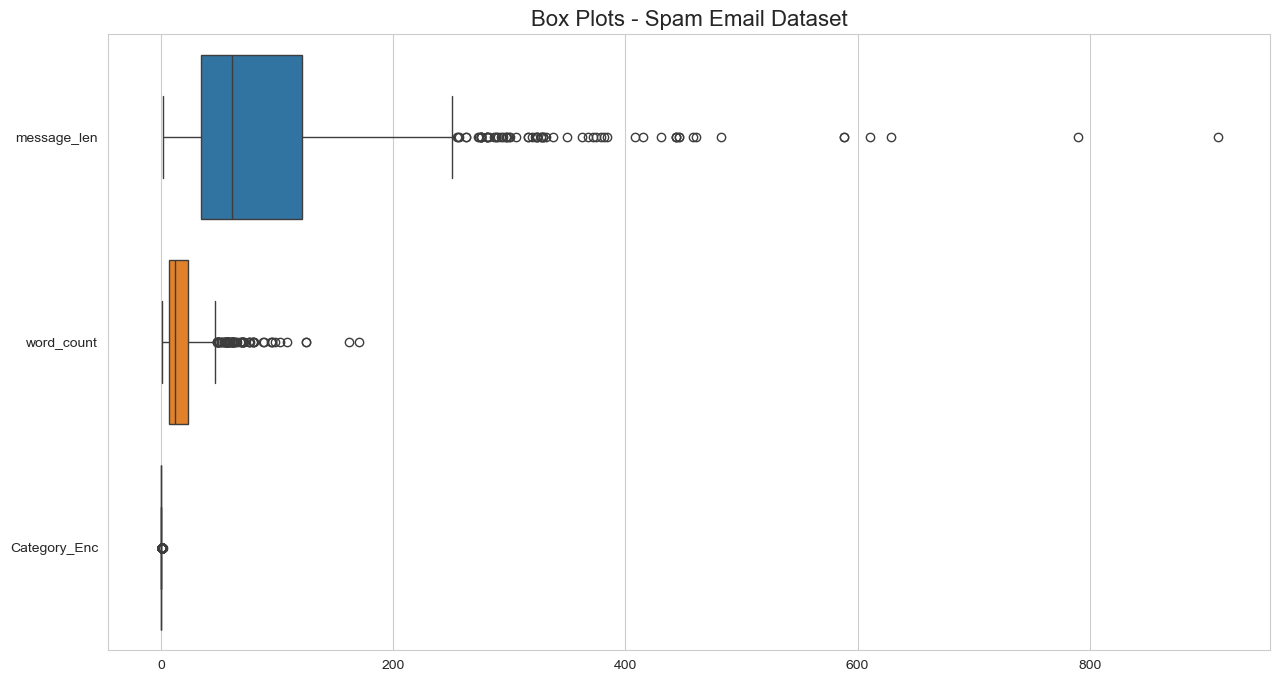


3. Correlation Heatmap (Spam Email Dataset)


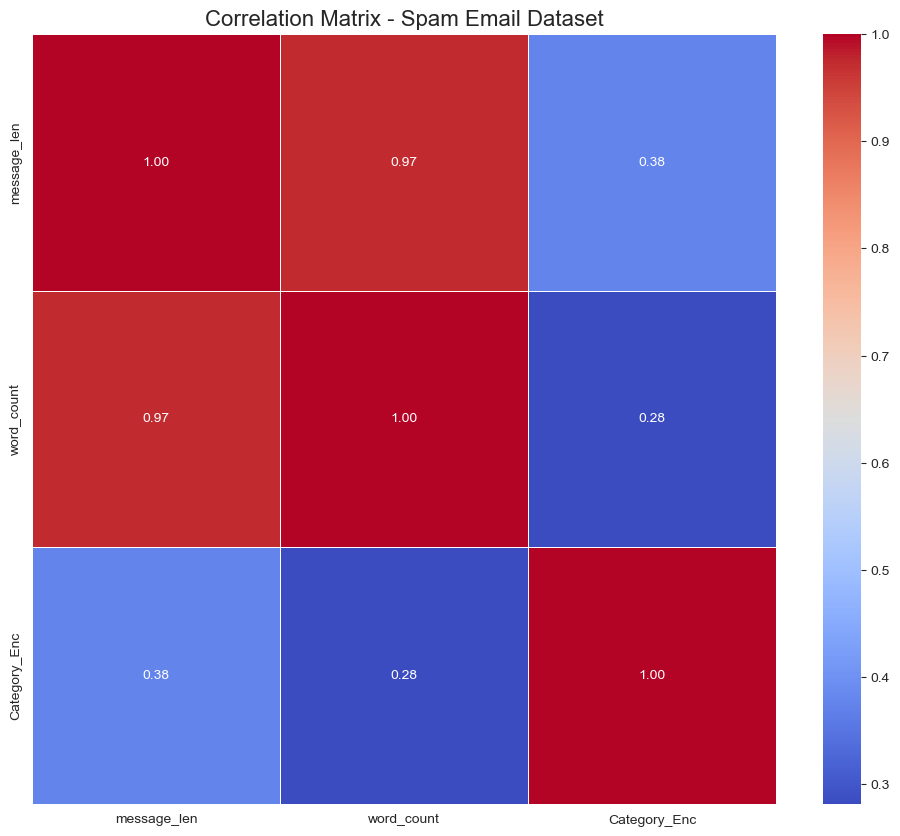


4. Pair Plot (Spam Email Dataset)


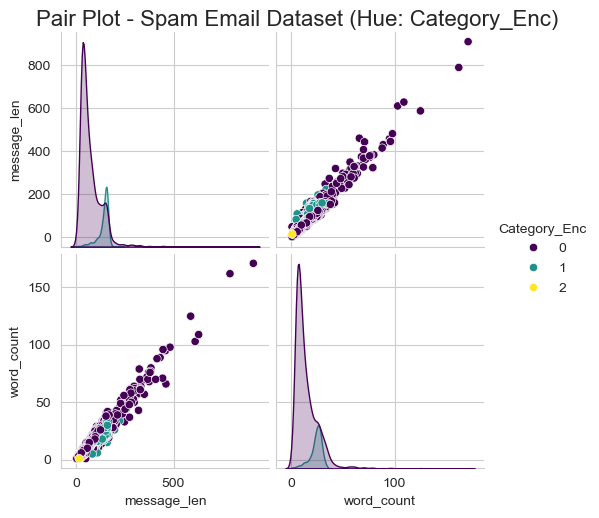

Spam Classification Accuracy: 0.97847533632287


In [13]:
try:
    df_email = pd.read_csv('email.csv')
    print("Email Dataset Loaded")
    
    # Feature Engineering for EDA
    df_email['message_len'] = df_email['Message'].astype(str).apply(len)
    df_email['word_count'] = df_email['Message'].astype(str).apply(lambda x: len(x.split()))
    
    # Encoding Target
    le_mail = LabelEncoder()
    df_email['Category_Enc'] = le_mail.fit_transform(df_email['Category'])
    
    # EDA
    perform_eda(df_email, "Spam Email Dataset", target_col='Category_Enc')
    
    # Model
    vec = CountVectorizer()
    X = vec.fit_transform(df_email['Message'].astype(str))
    y = df_email['Category_Enc']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    print("Spam Classification Accuracy:", nb.score(X_test, y_test))
    
except FileNotFoundError:
    print("email.csv not found.")


## Task 4: Iris Dataset Classification

Iris Dataset Loaded

EDA for Iris Dataset
--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_enc   150 non-null    int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB
None

--- First 5 Rows ---


sepal_length  sepal_width  petal_length  petal_width species  species_enc
0           5.1          3.5           1.4          0.2  setosa            0
1           4.9          3.0           1.4          0.2  setosa            0
2           4.7          3.2           1.3          0.2  setosa            0
3           4.6          3.1           1.5          0.2  setosa            0
4           5.0          3.6           1.4          0.2  setosa            0


1. Histogram Distribution (Iris Dataset)


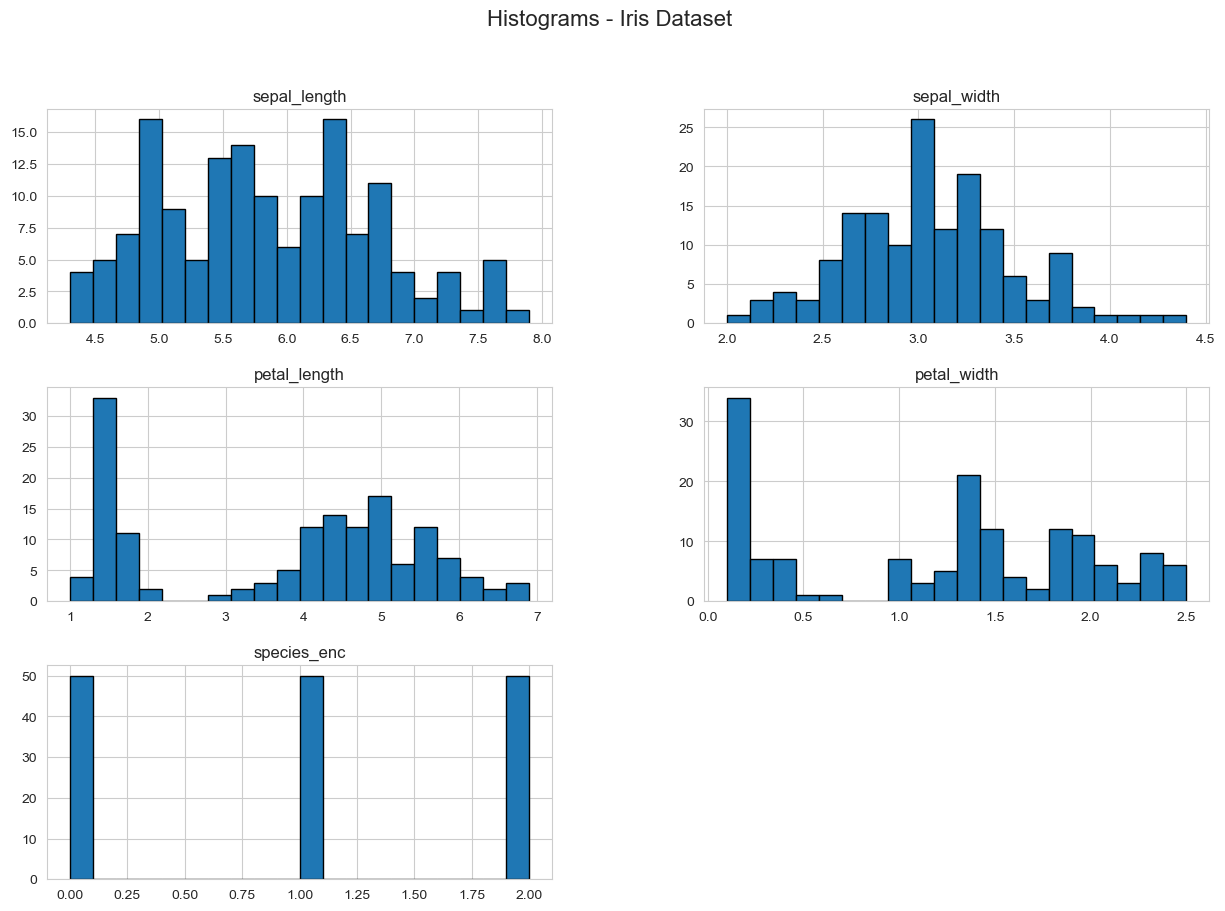


2. Box Plots for Outlier Detection (Iris Dataset)


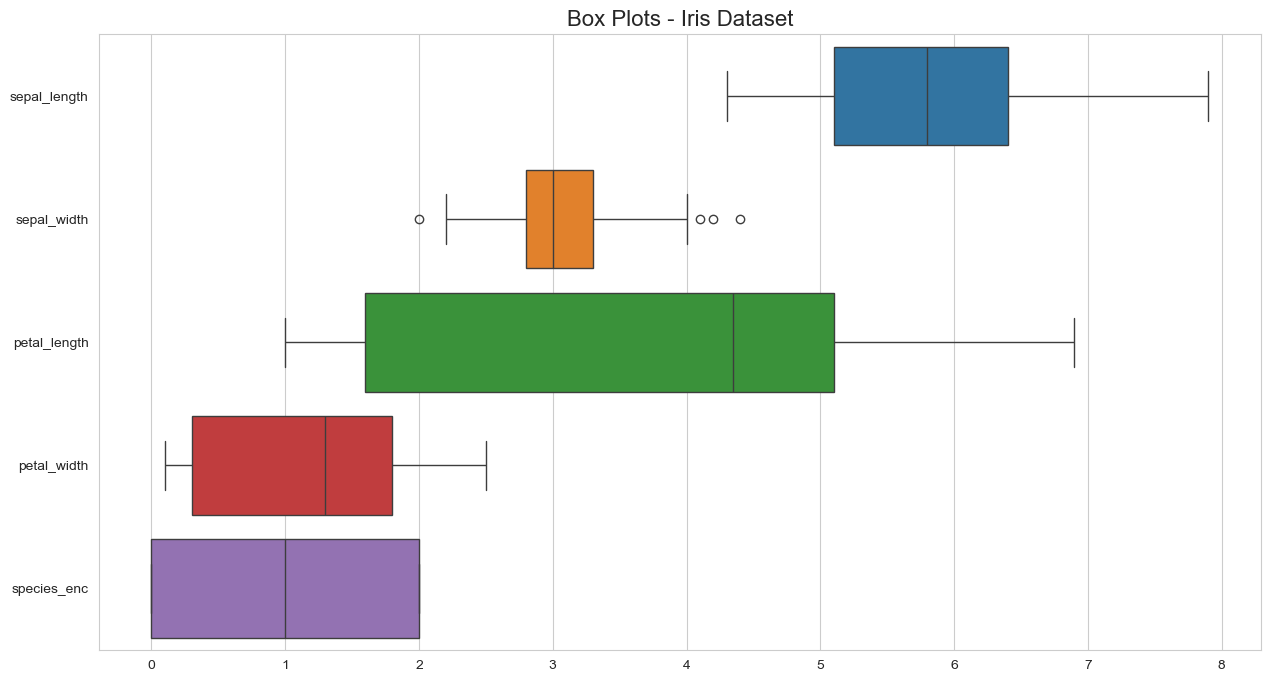


3. Correlation Heatmap (Iris Dataset)


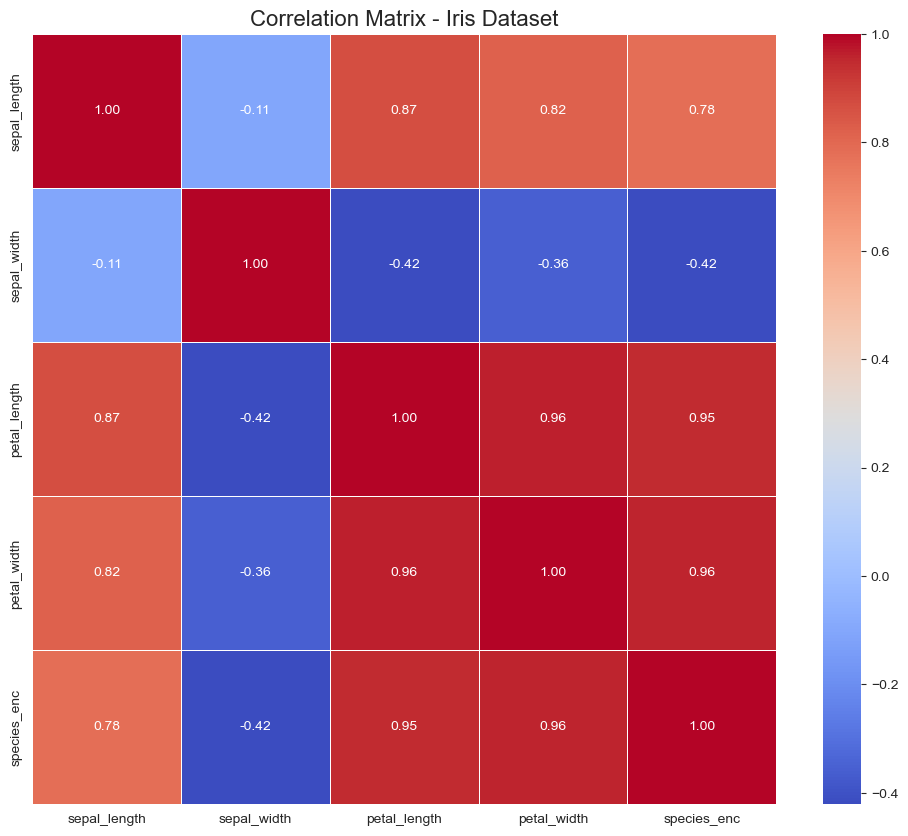


4. Pair Plot (Iris Dataset)


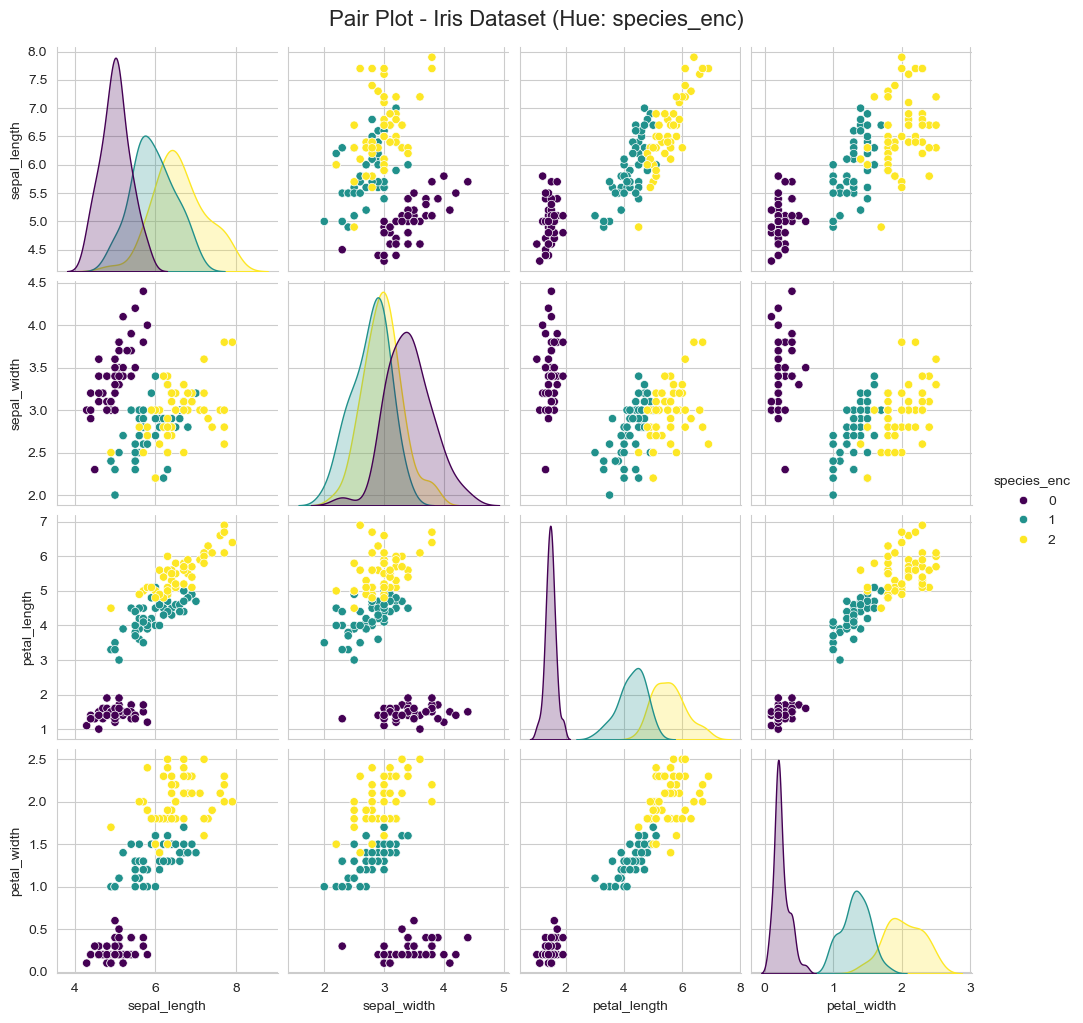

Iris Accuracy: 1.0


In [14]:
try:
    df_iris = pd.read_csv('iris.csv')
    print("Iris Dataset Loaded")
    
    # Encode Species if string
    if df_iris['species'].dtype == 'object':
        df_iris['species_enc'] = LabelEncoder().fit_transform(df_iris['species'])
        target = 'species_enc'
    else:
        target = 'species'

    # EDA
    perform_eda(df_iris, "Iris Dataset", target_col=target)
    
    # Model
    X = df_iris.drop(columns=['species', 'species_enc'], errors='ignore')
    y = df_iris[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_iris = RandomForestClassifier()
    rf_iris.fit(X_train, y_train)
    print("Iris Accuracy:", rf_iris.score(X_test, y_test))

except FileNotFoundError:
    print("iris.csv not found.")
